<a href="https://colab.research.google.com/github/olyvias/python/blob/main/TUGAS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy dan Matplotlib (Path Loss Simulation)
## OLYVIA FERNANDA SOEDRADJAT / 1101208479 / TTX-44-01

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.zeros(4)

array([0., 0., 0., 0.])

In [3]:
np.ones(3)

array([1., 1., 1.])

**(Baris,Kolom)**

In [4]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(3,47,4)

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43])

Arange = (Awal,Akhir,delta)

In [9]:
np.arange(4,5,0.1)

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [10]:
np.arange(2,-4,-0.5)

array([ 2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. ,
       -3.5])

In [11]:
np.linspace(2,10,4)

array([ 2.        ,  4.66666667,  7.33333333, 10.        ])

In [12]:
np.linspace(2,-4,4)

array([ 2.,  0., -2., -4.])

In [13]:
e=np.arange(0,20,2)

In [14]:
len(e)

10

In [15]:
e.reshape(5,2)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [16]:
e.reshape(2,5)

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [17]:
print(e)

[ 0  2  4  6  8 10 12 14 16 18]


In [18]:
f=e.reshape(5,2)

In [19]:
print(f)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]


In [20]:
np.random.random((3,4))

array([[0.46110813, 0.72089274, 0.75213907, 0.43310303],
       [0.09867759, 0.03754385, 0.93488348, 0.24045942],
       [0.26883293, 0.69625798, 0.33791304, 0.72941741]])

In [21]:
np.random.randint(1,20,10)

array([ 3, 18, 18,  9,  4, 11,  1,  6, 10, 19])

In [22]:
np.random.randn(3)

array([ 0.14600828, -0.52375701, -0.54932407])

# **Grafik Frekuensi 1800MHz pada Daerah Urban, Open, dan Sub Urban**

In [23]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [24]:
f=1800 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [25]:
print(d)

[646 638 429 443 635 327 696 332 210 521 312 240 289 582 386 247 568 409
 319 400 503 286 236 244 363 334 585 470 260 516 590 671 356 524 311 332
 442 348 545 465 523 223 507 513 295 452 636 311 219 613 430 383 470 393
 238 304 577 649 650 218 357 348 409 379 481 698 693 444 268 395 381 599
 422 301 226 652 417 259 565 591 513 516 603 431 336 392 550 365 508 381
 627 623 517 495 441 659 391 316 301 481 461 427 215 577 552 602 534 247
 266 252 264 340 524 352 343 434 585 617 310 681 363 561 326 551 655 589
 520 580 220 674 624 602 480 230 686 548 570 418 557 549 648 220 316 353
 610 460 523 536 495 421 425 312 305 529 443 421 556 622 481 471 685 286
 326 291 544 427 637 526 346 682 438 685 397 485 431 422 612 242 632 586
 261 676 299 292 364 583 668 430 554 382 534 498 546 587 291 350 355 213
 551 340]


In [26]:
LpUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)
LpSuburban=cos(f,loc3,tower,user,d)

In [27]:
print(LpUrban, LpOpen, LpSuburban)

[186.15655395 185.98102224 180.39045706 180.84280631 185.91462979
 176.56608938 187.20668516 176.77984519 170.32796189 183.12731614
 175.90464216 172.20891681 174.82596739 184.68695008 178.902675
 172.61388787 184.34396388 179.71795525 176.2171864  179.40452789
 182.63204584 174.67897923 171.97216775 172.44175248 178.03729354
 176.86444747 184.75937306 181.67618932 173.3364174  182.99147866
 184.87925665 186.69140322 177.76300487 183.20819429 175.85942145
 176.77984519 180.81097299 177.44284933 183.76170046 181.52553294
 183.18128647 171.17404105 182.74362058 182.90934294 175.11542082
 181.12611449 185.9367954  175.85942145 170.91907957 185.41794817
 180.42325391 178.79276882 181.67618932 179.15583628 172.09103965
 175.53874529 184.56541147 186.22181849 186.24350631 170.85461155
 177.80251748 177.44284933 179.71795525 178.64488045 182.00206845
 187.24710481 187.14583739 180.87456785 173.76330575 179.22734017
 178.71901871 185.09250907 180.15871585 175.39904592 171.36227866
 186.2867820

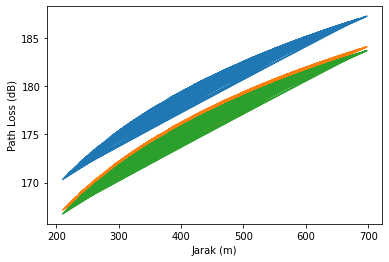

In [28]:
plt.figure()
plt.plot(d,LpUrban)
plt.plot(d,LpOpen)
plt.plot(d,LpSuburban)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [29]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban[np.argsort(d)]
Open_sort2=LpOpen[np.argsort(d)]
Suburban_sort3=LpSuburban[np.argsort(d)]

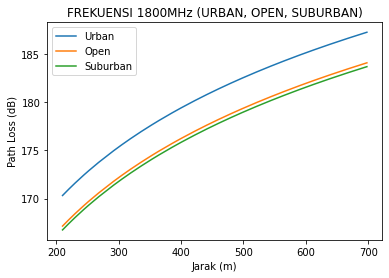

In [30]:
plt.figure()
plt.title('FREKUENSI 1800MHz (URBAN, OPEN, SUBURBAN)')
plt.plot(d_sort,Urban_sort1, label='Urban')
plt.plot(d_sort,Open_sort2, label="Open")
plt.plot(d_sort,Suburban_sort3, label="Suburban")
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# **Grafik Model Urban pada Frekuensi 700MHz, 900MHz, dan 1800MHz**

In [31]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [32]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [33]:
print(d)

[282 405 242 235 233 677 480 528 500 418 339 328 554 398 689 681 551 579
 468 479 405 598 239 227 497 571 217 258 592 444 663 485 236 235 348 403
 503 657 657 608 514 500 495 417 677 566 336 345 481 334 571 497 350 624
 366 672 226 389 599 667 260 463 467 647 577 683 250 316 372 444 525 604
 377 505 245 448 421 530 462 265 523 541 433 328 544 572 426 665 641 520
 434 318 244 335 643 342 426 329 249 626 349 220 304 316 692 610 561 597
 405 431 398 683 646 634 619 681 389 466 625 626 662 595 373 330 480 239
 569 592 294 373 441 487 541 652 487 664 241 459 599 631 420 213 434 378
 678 663 683 495 576 653 593 483 660 649 372 289 669 526 425 265 292 485
 352 386 656 641 697 456 642 520 405 409 517 695 533 683 394 671 430 428
 440 310 279 404 330 647 369 317 635 495 582 474 316 224 213 320 250 389
 654 512]


In [34]:
LpUrban700=cos(f1,loc,tower,user,d)
LpUrban900=cos(f2,loc,tower,user,d)
LpUrban1800=cos(f3,loc,tower,user,d)

In [35]:
print(LpUrban700, LpUrban900, LpUrban1800)

[161.84152075 166.94045696 159.68675822 159.27329599 159.15290006
 174.17774333 169.33369515 170.67625698 169.90872346 167.3855027
 164.43469899 163.97004333 171.35335993 166.69486254 174.4252385
 174.26072582 171.27687338 171.97509533 168.97706249 169.30431821
 166.94045696 172.42991566 159.51104404 158.78541216 169.82395147
 171.77910974 158.15078963 160.58858533 172.28786837 168.23551036
 173.88339333 169.47966783 159.33311025 159.27329599 164.80379183
 166.87072297 169.99298835 173.75533574 173.75533574 172.66352363
 170.29771727 169.90872346 169.76715204 167.35176319 174.17774333
 171.65521943 164.30948716 164.6818323  169.36301095 164.22538997
 171.77910974 169.82395147 164.88451548 173.0294205  165.51417282
 174.073323   158.72322116 166.37267279 172.45345157 173.96812283
 160.69735991 168.82575881 168.94693149 173.53928492 171.92635398
 174.30203447 160.14488762 163.44502961 165.74322237 168.23551036
 170.59599331 172.57054483 165.93129243 170.04888619 159.86030749
 168.3618451

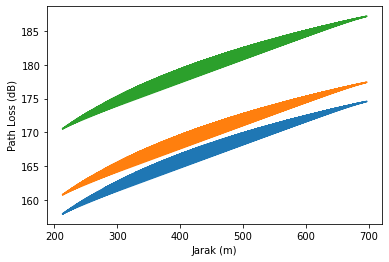

In [36]:
plt.figure()
plt.plot(d,LpUrban700)
plt.plot(d,LpUrban900)
plt.plot(d,LpUrban1800)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [37]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban700[np.argsort(d)]
Urban_sort2=LpUrban900[np.argsort(d)]
Urban_sort3=LpUrban1800[np.argsort(d)]

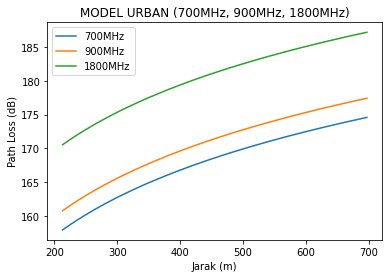

In [38]:
plt.figure()
plt.plot(d_sort,Urban_sort1, label='700MHz')
plt.plot(d_sort,Urban_sort2, label='900MHz')
plt.plot(d_sort,Urban_sort3, label='1800MHz')
plt.legend()
plt.title('MODEL URBAN (700MHz, 900MHz, 1800MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()